<a href="https://colab.research.google.com/github/Diacod-I/moore/blob/main/Moore's_Law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-12-31 11:00:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.5’

moore.csv.5         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-12-31 11:00:59 (45.7 MB/s) - ‘moore.csv.5’ saved [2302/2302]



In [271]:
data = pd.read_csv("moore.csv", header=None).to_numpy()

In [272]:
X = data[:,0].reshape(-1,1)
Y = data[:,1]

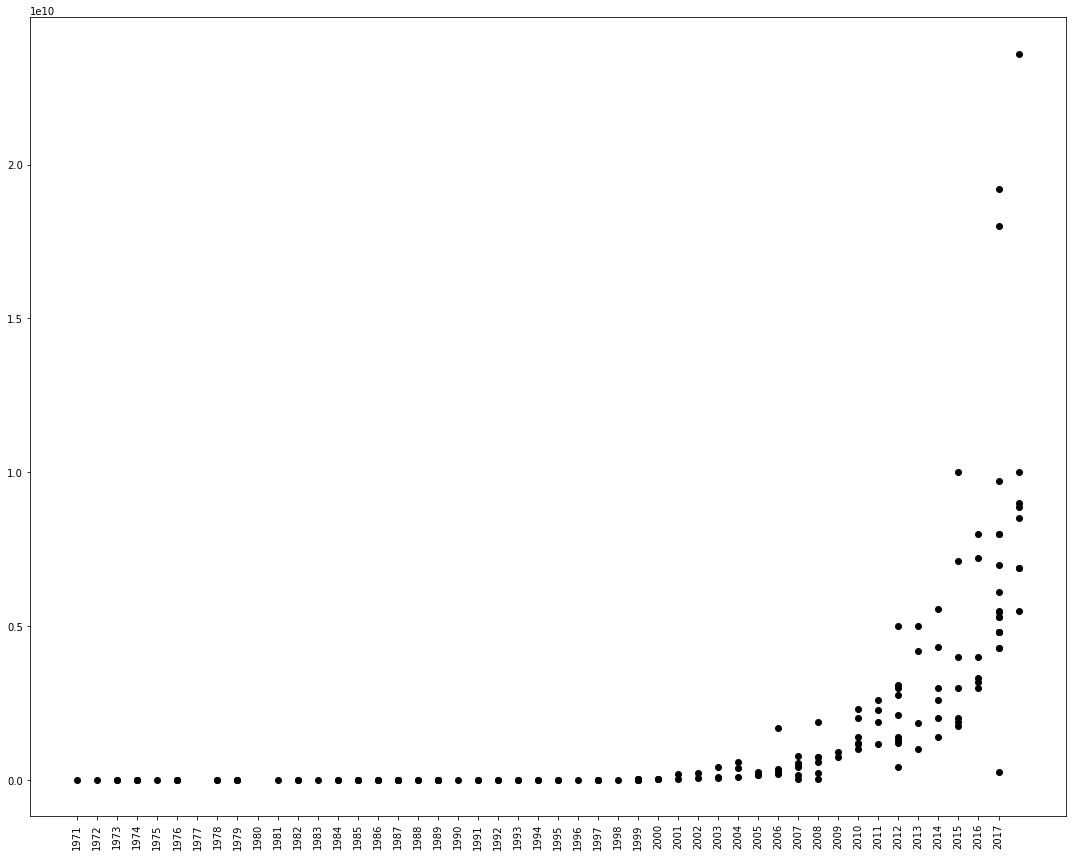

In [273]:
plt.rcParams["figure.figsize"]=(15,12)
plt.rcParams['figure.autolayout'] = True
plt.scatter(X,Y,c='black')
plt.xticks(np.arange(1971,2018,step=1),rotation=90)
plt.show()

In [274]:
Y=np.log(Y)

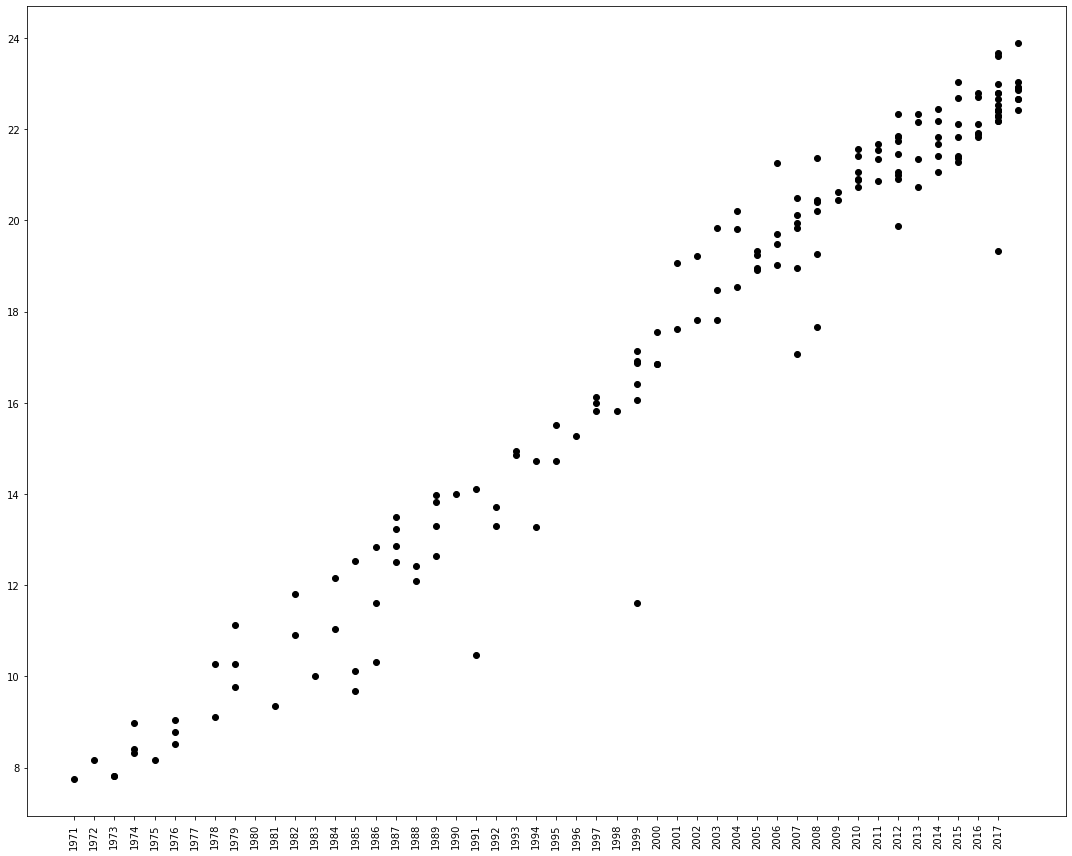

In [275]:
plt.scatter(X,Y,c='black')
plt.xticks(np.arange(1971,2018,step=1),rotation=90)
plt.show()

In [276]:
X = X-X.mean()

In [277]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [278]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.0001,0.9),
    loss = 'mse'
)

In [279]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [280]:
r = model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 431.1037 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 387.4583 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 274.6274 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 235.2536 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 191.9756 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 160.1738 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 101.2084 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 87.6051 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 60.4264 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 43.2322 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

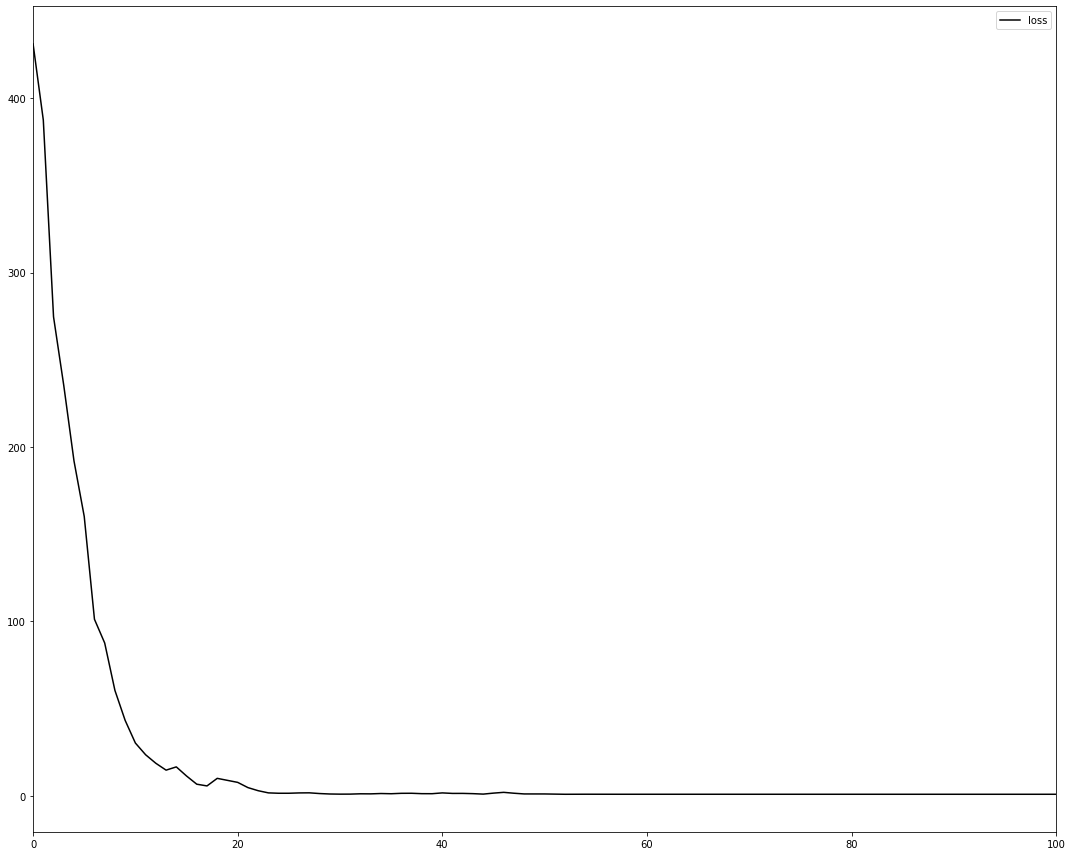

In [281]:
plt.plot(r.history['loss'],label='loss',color='black')
plt.legend()
plt.xlim(0,100)
plt.show()

In [282]:
model.layers[0].get_weights()

[array([[0.34630877]], dtype=float32), array([17.767097], dtype=float32)]

In [283]:
a = model.layers[0].get_weights()[0][0,0]
a

0.34630877

###Exponential Growth Formula for Transistor growth

> ***C = A<sub>0</sub>r<sup>t</sup>***

where *C* is the transistor count<br>*t* is the year<br>*r* is the rate of growth<br>*A<sub>0</sub>* is the initial transistor count (from the year 1971 for the dataset used)

###Logarithmic Representation

> ***log C =  t (log r) + log A<sub>0</sub>***

which is the linear equation 
> ***y = ax + b***

So *y = log C* and *x = t*
<br>Also *log r = a* and given our regression weights, we know that:

> a = 0.34684435

Therefore, ***r = e<sup>0.34684435</sup> = 1.414596526***
<br>Now to find time to double, we simply need to calculate for *2C*

So dividing the double growth formula with the original growth formula, we get:


> ***2C/C = A<sub>0</sub>r<sup>t'</sup>/A<sub>0</sub>r<sup>t</sup>***
<br>=> ***2 = r<sup>(t' - t)***

Solving for *(t' - t)*,


> ***(t' - t) = log 2 / log r = log 2 / a*** 





In [284]:
dubtime = np.log(2)/a
print("Time to double:",dubtime,'years')

Time to double: 2.001529400979915 years


In [285]:
X = np.array(X).flatten()
Y = np.array(Y).flatten()
print(X,'\n')
print(Y)

[-31.19753086 -30.19753086 -29.19753086 -29.19753086 -28.19753086
 -28.19753086 -28.19753086 -27.19753086 -26.19753086 -26.19753086
 -26.19753086 -24.19753086 -24.19753086 -23.19753086 -23.19753086
 -23.19753086 -21.19753086 -20.19753086 -20.19753086 -19.19753086
 -18.19753086 -18.19753086 -17.19753086 -17.19753086 -17.19753086
 -16.19753086 -16.19753086 -16.19753086 -15.19753086 -15.19753086
 -15.19753086 -15.19753086 -14.19753086 -14.19753086 -13.19753086
 -13.19753086 -13.19753086 -13.19753086 -12.19753086 -11.19753086
 -11.19753086 -10.19753086 -10.19753086  -9.19753086  -9.19753086
  -8.19753086  -8.19753086  -7.19753086  -3.19753086  -7.19753086
  -6.19753086  -5.19753086  -5.19753086  -5.19753086  -4.19753086
  -3.19753086  -3.19753086  -2.19753086  -2.19753086  -3.19753086
  -3.19753086  -3.19753086  -2.19753086  -1.19753086  -1.19753086
  -0.19753086   1.80246914   1.80246914   2.80246914   3.80246914
   2.80246914   3.80246914   4.80246914   5.80246914   0.80246914
   0.80246

In [286]:
denom = X.dot(X) - X.mean()*X.sum()
denom

30173.67901234569

In [287]:
a = (X.dot(Y) - Y.mean()*X.sum())/denom
b = (Y.mean()*X.dot(X) - X.mean()*X.dot(Y))/denom
print('a and b values are',a,',',b,'which is almost the same value as that of the model weights')

a and b values are 0.341682487387313 , 17.764939393631764 which is almost the same value as that of the model weights


6/6 [==============================] - 0s 3ms/step


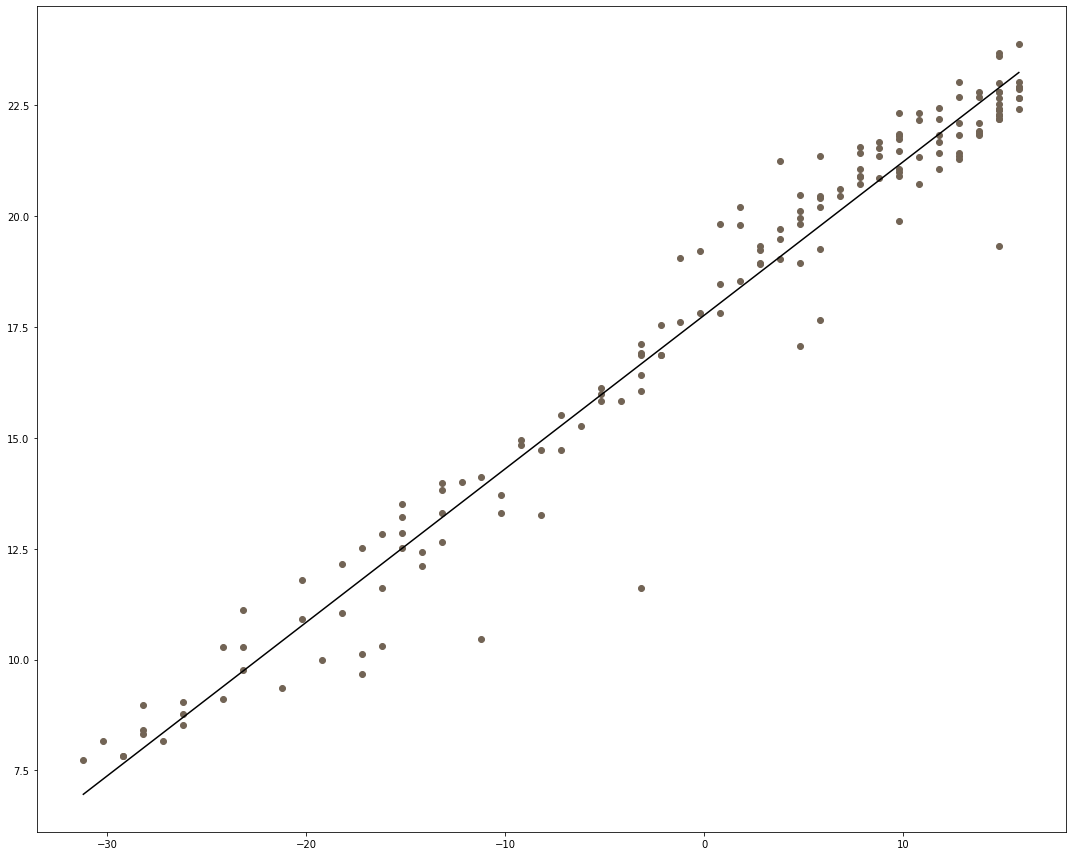

In [288]:
Yt = model.predict(X).flatten()
colo = '#726455'
plt.scatter(X,Y,c=colo)
plt.plot(X,Yt,color='black')
plt.show()

In [289]:
w,b = model.layers[0].get_weights()
X = X.reshape(-1,1)
Yt2 = (X.dot(w) + b).flatten()
np.allclose(Yt,Yt2) #allclose returns true when both arrays have equal elements with a certain tolerance limit

True

In [290]:
Yt

array([ 6.9631195,  7.309428 ,  7.655737 ,  7.655737 ,  8.002046 ,
        8.002046 ,  8.002046 ,  8.348354 ,  8.694663 ,  8.694663 ,
        8.694663 ,  9.38728  ,  9.38728  ,  9.733589 ,  9.733589 ,
        9.733589 , 10.426207 , 10.772515 , 10.772515 , 11.118824 ,
       11.465134 , 11.465134 , 11.811441 , 11.811441 , 11.811441 ,
       12.157751 , 12.157751 , 12.157751 , 12.504059 , 12.504059 ,
       12.504059 , 12.504059 , 12.8503685, 12.8503685, 13.196676 ,
       13.196676 , 13.196676 , 13.196676 , 13.542986 , 13.889295 ,
       13.889295 , 14.235603 , 14.235603 , 14.581912 , 14.581912 ,
       14.928221 , 14.928221 , 15.274529 , 16.659765 , 15.274529 ,
       15.620838 , 15.967147 , 15.967147 , 15.967147 , 16.313456 ,
       16.659765 , 16.659765 , 17.006073 , 17.006073 , 16.659765 ,
       16.659765 , 16.659765 , 17.006073 , 17.352383 , 17.352383 ,
       17.69869  , 18.391308 , 18.391308 , 18.737617 , 19.083925 ,
       18.737617 , 19.083925 , 19.430235 , 19.776543 , 18.045 

In [291]:
Yt2

array([ 6.963119  ,  7.30942777,  7.65573654,  7.65573654,  8.0020453 ,
        8.0020453 ,  8.0020453 ,  8.34835407,  8.69466284,  8.69466284,
        8.69466284,  9.38728038,  9.38728038,  9.73358914,  9.73358914,
        9.73358914, 10.42620668, 10.77251545, 10.77251545, 11.11882421,
       11.46513298, 11.46513298, 11.81144175, 11.81144175, 11.81144175,
       12.15775052, 12.15775052, 12.15775052, 12.50405929, 12.50405929,
       12.50405929, 12.50405929, 12.85036805, 12.85036805, 13.19667682,
       13.19667682, 13.19667682, 13.19667682, 13.54298559, 13.88929436,
       13.88929436, 14.23560313, 14.23560313, 14.58191189, 14.58191189,
       14.92822066, 14.92822066, 15.27452943, 16.6597645 , 15.27452943,
       15.6208382 , 15.96714696, 15.96714696, 15.96714696, 16.31345573,
       16.6597645 , 16.6597645 , 17.00607327, 17.00607327, 16.6597645 ,
       16.6597645 , 16.6597645 , 17.00607327, 17.35238204, 17.35238204,
       17.6986908 , 18.39130834, 18.39130834, 18.73761711, 19.08